# Теоретические вопросы
## В чём различие между зависимыми и независимыми выборками?
**Ответ:** Зависимые выборки обычно являются одной и той же выборкой до и после эксперементального воздействия, независимые выборки, по определению, никак не зависят непосредственно друг от друга. Тип выборки влияет на выбор статистических методов.

## Когда применяются параметрические статистические критерии, а когда — их непараметрические аналоги?
**Ответ:** Параметрические методы предпологают нормально распеределенную выборку данных, непараметрические методы не зависят от типа выборки, но менее мощные и значимые.

# Анализ курсового датасета

### Описание датасета 
**подпункты с описанием добавленных столбцов после подготовки**


* **Home Ownership** - домовладение
        
        1. разложен на дамми переменные
    
* **Annual Income** - годовой доход
        
        1. Annual Income upd.2 - пропуски заполены мединой
        2. Annual Income upd.3 - пропуски заполнены моделью (близжайшие соседи)
        
* **Years in current job** - количество лет на текущем месте работы

        1. upd2 - замененные на числовые значения и заполненные модой
        2. дамми переменные заполненные модой
        
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
        
        1. upd.2 - пропуски заполены модой
        
* **Purpose** - цель кредита
        
        1. разложен на дамми переменные
  
* **Term** - срок кредита
        
        1. разложен на дамми переменные
  
* **Current Loan Amount** - текущая сумма кредита
        
        1. ver.2 - выбросы заполены регрессией
        
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)
* **Credit Score** - кредитные очки
        
        1. ver.2 - убраны выбросы и заполнены пропуски с помощью модели
        2. ver.3 - убраны выбросы и заполнены пропуски медианой

# Подключаем библиотеки

In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from mca import MCA

# Прописываем пути до файлов

In [4]:
PATH_COURSE_PROJECT_DATASET_TRAIN_PREP = 'course_project/course_project_train_prep.csv'
PATH_COURSE_PROJECT_DATASET_TRAIN = 'course_project/course_project_train.csv'

PATH_COURSE_PROJECT_DATASET_TEST_PREP = 'course_project/course_project_test_prep.csv'
PATH_COURSE_PROJECT_DATASET_TEST = 'course_project/course_project_test.csv'

# Загружаем базы данных
Чистим от не нужных столбцов 

In [5]:
df_base = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TRAIN)

df_new = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TRAIN_PREP)
df_new.drop('Unnamed: 0', axis=1, inplace=True)

df_test_base = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TEST)
df_test_new = pd.read_csv(PATH_COURSE_PROJECT_DATASET_TEST_PREP)
df_test_new.drop('Unnamed: 0', axis=1, inplace=True)

### Заполняем Annual Income моделью ближайших соседей и добавляем в новый столбец "Annual Income upd.3"

In [6]:
imputer = KNNImputer()

In [7]:
LIST_FEATURES_FOR_IMPUTER = ['Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies', 'Current Credit Balance', 'Monthly Debt', 'Term_Short Term', 'Purpose_buy a car', 'Purpose_buy house', 'Purpose_debt consolidation', 'Purpose_educational expenses', 'Purpose_home improvements', 'Purpose_major purchase', 'Purpose_medical bills', 'Purpose_moving', 'Purpose_other', 'Purpose_renewable energy', 'Purpose_small business', 'Purpose_take a trip', 'Purpose_vacation', 'Purpose_wedding', 'Home Ownership_Home Mortgage', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Years in current job upd.2', 'Bankruptcies upd.2', 'Credit Score ver.2', 'Current Loan Amount ver.2', 'Annual Income']

In [8]:
df_new['Annual Income upd.3'] = imputer.fit_transform(df_new[LIST_FEATURES_FOR_IMPUTER])[:, [-1]]
df_test_new['Annual Income upd.3'] = imputer.transform(df_test_new[LIST_FEATURES_FOR_IMPUTER])[:, [-1]]

In [9]:
df_new.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,...,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Bankruptcies upd.2,Credit Score ver.2,Credit Score ver.3,Current Loan Amount ver.2,Annual Income upd.3
0,Own Home,482087.0,10+ years,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,...,0,0,0,0,0,1.0,749.0,749.0,151939.113822,482087.0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,...,0,0,0,0,0,0.0,737.0,737.0,264968.000000,1025487.0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,...,0,0,1,0,0,0.0,742.0,742.0,269202.070340,751412.0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,...,1,0,0,0,0,1.0,694.0,694.0,121396.000000,805068.0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,...,0,0,1,0,0,0.0,719.0,719.0,125840.000000,776264.0


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Home Ownership                  7500 non-null   object 
 1   Annual Income                   5943 non-null   float64
 2   Years in current job            7500 non-null   object 
 3   Tax Liens                       7500 non-null   float64
 4   Number of Open Accounts         7500 non-null   float64
 5   Years of Credit History         7500 non-null   float64
 6   Maximum Open Credit             7500 non-null   float64
 7   Number of Credit Problems       7500 non-null   float64
 8   Months since last delinquent    3419 non-null   float64
 9   Bankruptcies                    7486 non-null   float64
 10  Purpose                         7500 non-null   object 
 11  Term                            7500 non-null   object 
 12  Current Loan Amount             75

# Выделение целевой переменной и групп признаков

In [11]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df_new.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()

# Обзор распределения

In [12]:
df_new[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

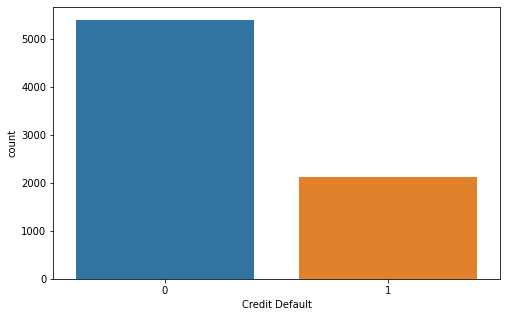

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x=TARGET_NAME, data=df_new)

plt.show()

# Коореляция таргета с признаками
P.S: Заполнеными признаками

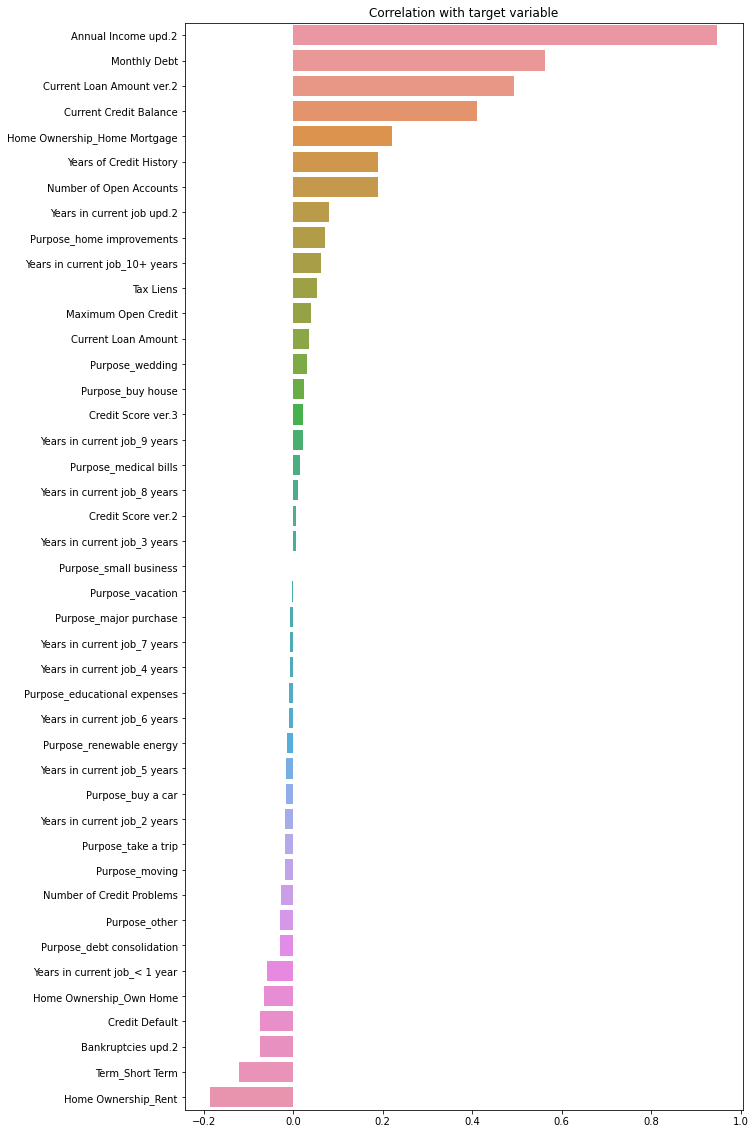

In [14]:
corr_with_target = df_new[[i for i in df_new.columns if df_new[i].count() == 7500]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 20))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

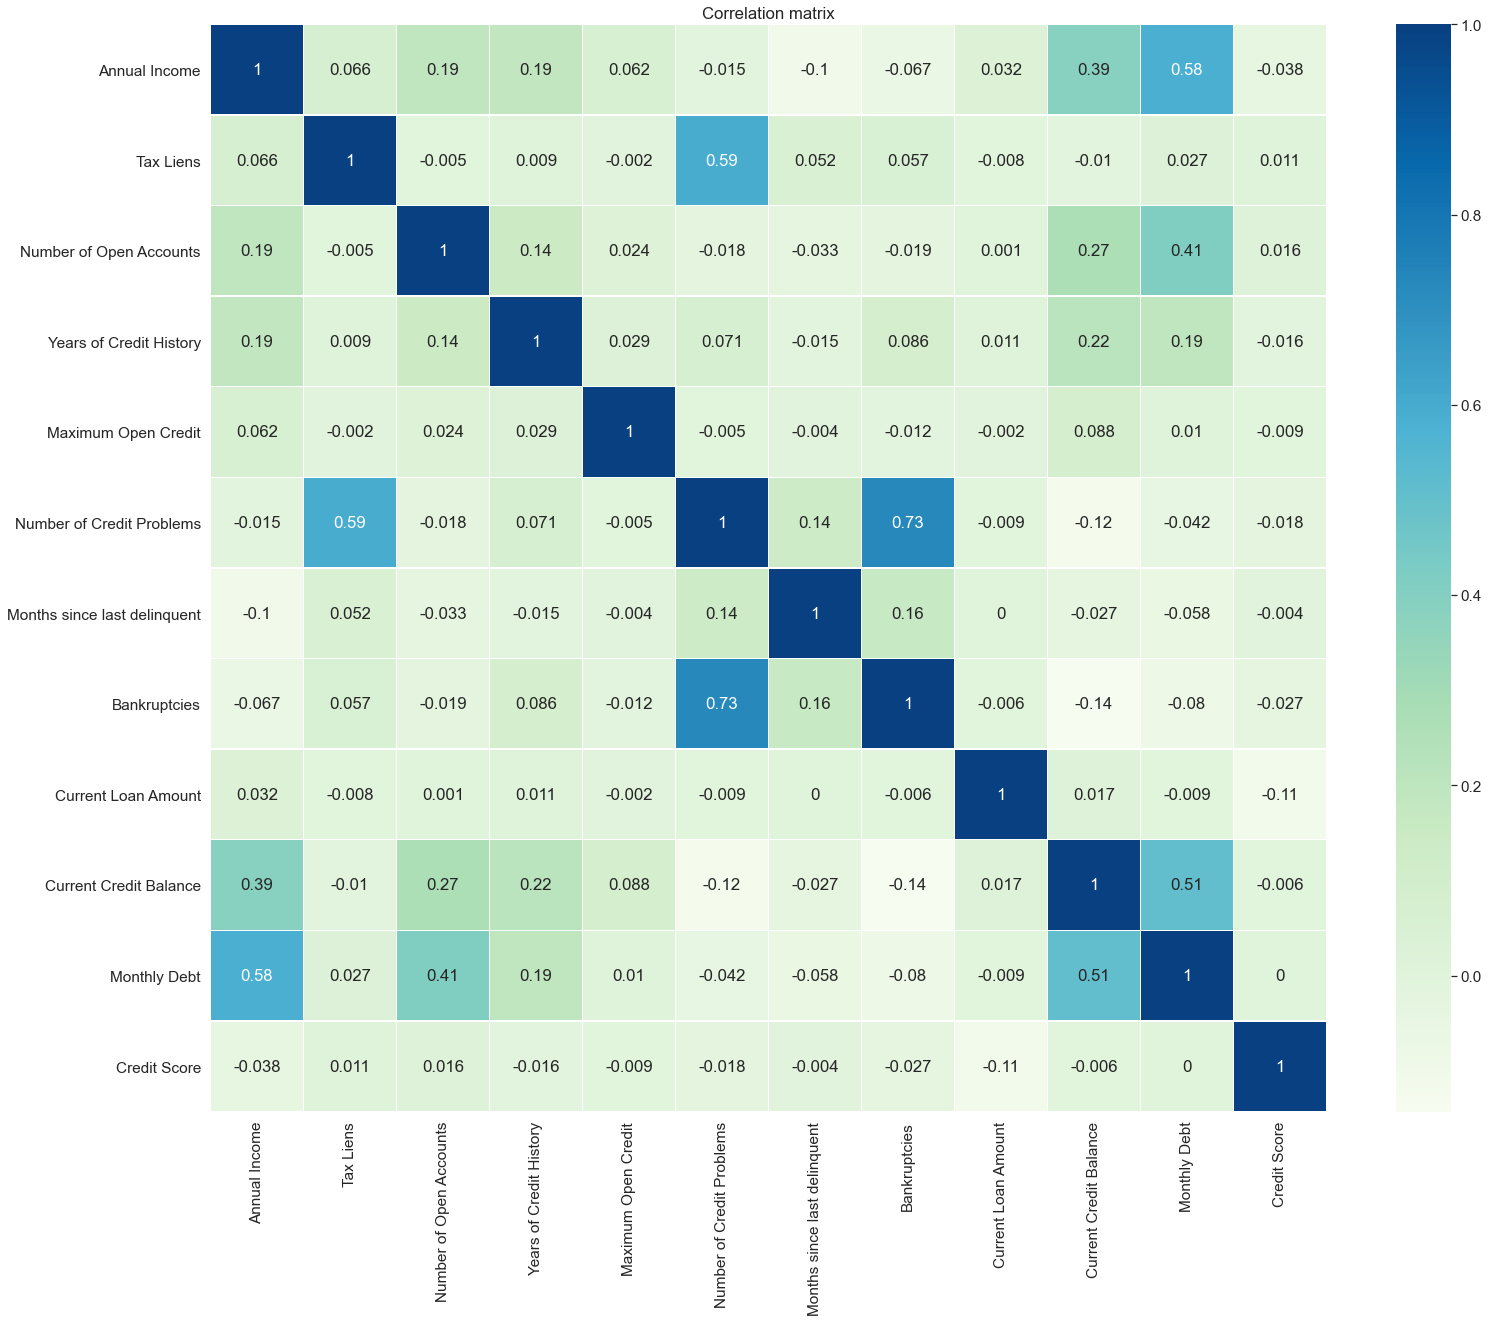

In [15]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_new[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

# Оценка признака "Credit Score ver.2" в разрезе целевой переменной

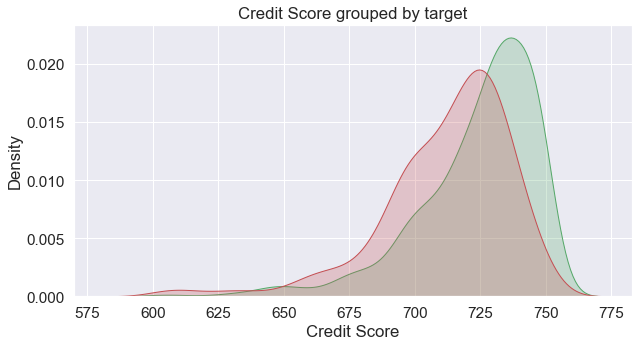

In [16]:
credit_score_with_target_s = df_new[['Credit Score ver.2', TARGET_NAME]].sample(1000)
credit_score_s = credit_score_with_target_s['Credit Score ver.2']
credit_score_target_0 = credit_score_s[credit_score_with_target_s[TARGET_NAME] == 0]
credit_score_target_1 = credit_score_s[credit_score_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(credit_score_target_0, shade=True, label='No default', color='g')
sns.kdeplot(credit_score_target_1, shade=True, label='Default', color='r')

plt.xlabel('Credit Score')
plt.title('Credit Score grouped by target')
plt.show()

## Проверка на нормальность

In [17]:
shapiro(credit_score_s)

ShapiroResult(statistic=0.884447455406189, pvalue=1.1922485498540716e-26)

Не является нормально распеределнным

### Визуальная проверка нормальности

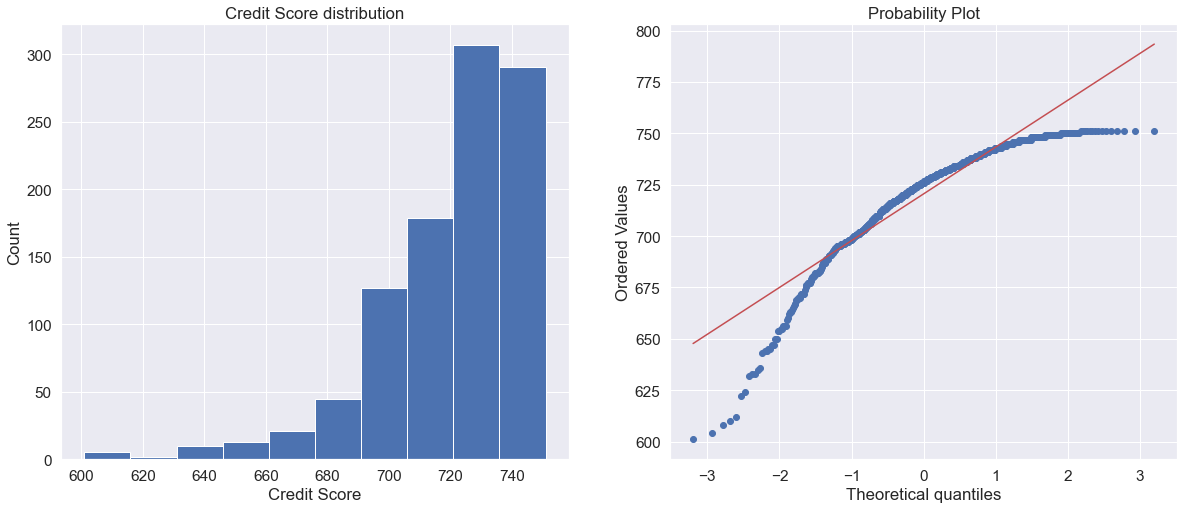

In [18]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Credit Score')
ax1.set_ylabel('Count')
ax1.set_title('Credit Score distribution')
credit_score_s.hist()

plt.subplot(122)
probplot(credit_score_s, dist='norm', plot=plt)

plt.show()

## Проверка эквивалентности мат. ожадиний

In [19]:
mannwhitneyu(credit_score_target_0, credit_score_target_1)

MannwhitneyuResult(statistic=65331.5, pvalue=2.7955969460567073e-16)

Не эквивалентны

## Визуальная проверка доверительных интервалов

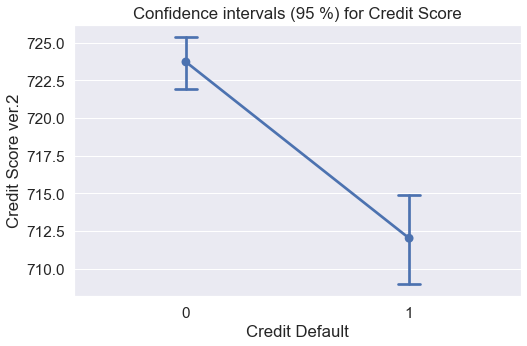

In [20]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Credit Score ver.2', data=credit_score_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Credit Score')
plt.show()

Не пересекаются

# Оценка признака "Term" в разрезе целевой переменной

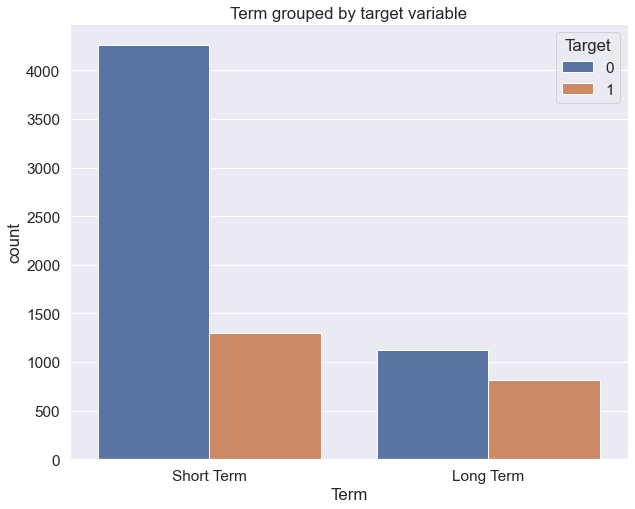

In [21]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Term", hue=TARGET_NAME, data=df_new)
plt.title('Term grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

## Проверка на согласованность частот

In [22]:
Term_and_target_s = df_new.loc[df_new['Term'].isin(['Short Term', 'Long Term']), ['Term', TARGET_NAME]].sample(1000)
Term_and_target_s['ID'] = Term_and_target_s.index

In [23]:
table = Term_and_target_s.pivot_table(values='ID', index='Term', columns=TARGET_NAME, aggfunc='count')
table

Credit Default,0,1
Term,,
Long Term,160,91
Short Term,571,178


In [24]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.00011249646979164824

Частоты не согласованы

# Оценка признака "Annual Income upd.3" в разрезе целевой переменной

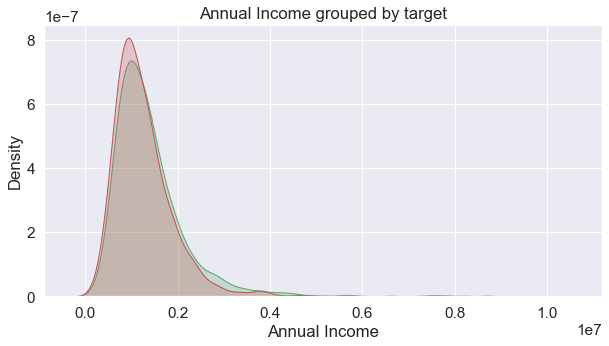

In [25]:
annual_income_with_target_s = df_new[['Annual Income upd.3', TARGET_NAME]].sample(5000)
annual_income_s = annual_income_with_target_s['Annual Income upd.3']
annual_income_target_0 = annual_income_s[annual_income_with_target_s[TARGET_NAME] == 0]
annual_income_target_1 = annual_income_s[annual_income_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(annual_income_target_0, shade=True, label='No default', color='g')
sns.kdeplot(annual_income_target_1, shade=True, label='Default', color='r')

plt.xlabel('Annual Income')
plt.title('Annual Income grouped by target')
plt.show()

## Проверка на нормальность

In [26]:
shapiro(annual_income_s)

ShapiroResult(statistic=0.7667940855026245, pvalue=0.0)

Не является нормально распеределнным

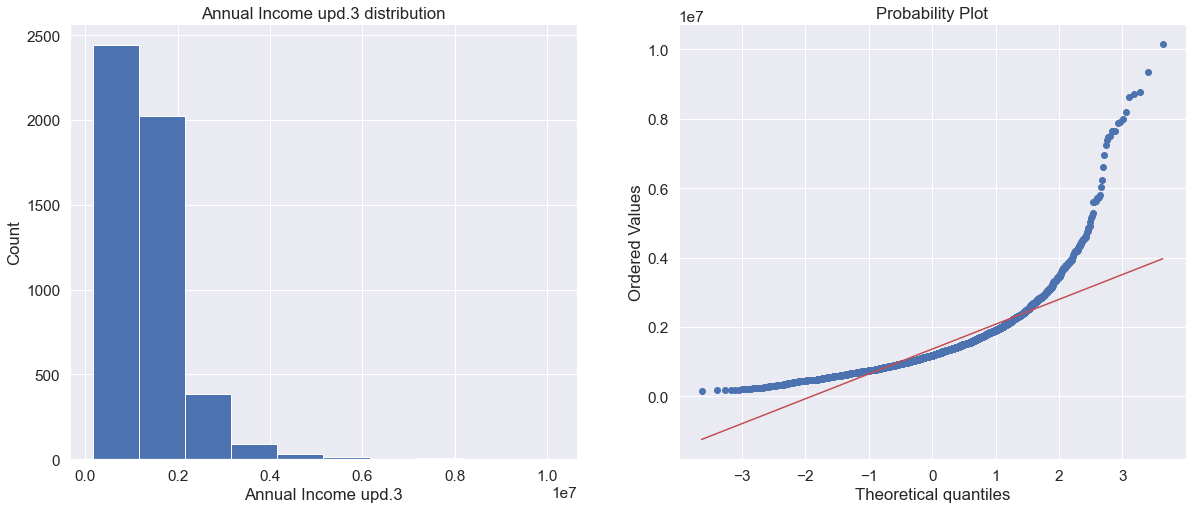

In [27]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Annual Income upd.3')
ax1.set_ylabel('Count')
ax1.set_title('Annual Income upd.3 distribution')
annual_income_s.hist()

plt.subplot(122)
probplot(annual_income_s, dist='norm', plot=plt)

plt.show()

## Проверка эквивалентности мат. ожадиний

In [28]:
mannwhitneyu(annual_income_target_0, annual_income_target_1)

MannwhitneyuResult(statistic=2282068.0, pvalue=1.3321012989983963e-07)

Не эквивалентны

## Визуальная проверка доверительных интервалов

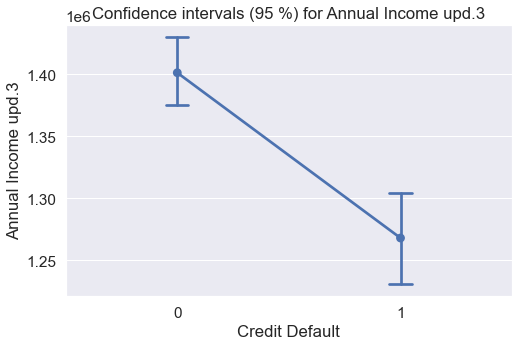

In [29]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Annual Income upd.3', data=annual_income_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Annual Income upd.3')
plt.show()

Не пересекаются

# Оценка признака "Current Loan Amount ver.2" в разрезе целевой переменной

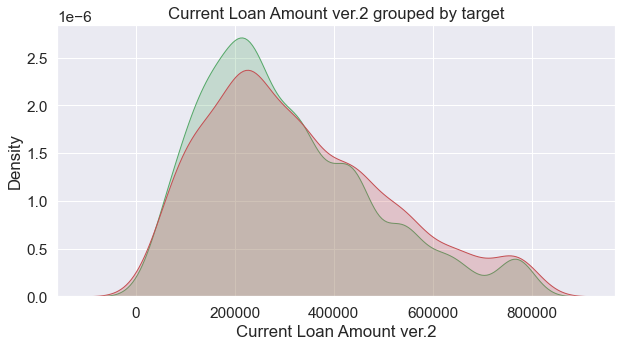

In [30]:
current_loan_v2_with_target_s = df_new[['Current Loan Amount ver.2', TARGET_NAME]].sample(5000)
current_loan_v2_s = current_loan_v2_with_target_s['Current Loan Amount ver.2']
current_loan_v2_target_0 = current_loan_v2_s[current_loan_v2_with_target_s[TARGET_NAME] == 0]
current_loan_v2_target_1 = current_loan_v2_s[current_loan_v2_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(current_loan_v2_target_0, shade=True, label='No default', color='g')
sns.kdeplot(current_loan_v2_target_1, shade=True, label='Default', color='r')

plt.xlabel('Current Loan Amount ver.2')
plt.title('Current Loan Amount ver.2 grouped by target')
plt.show()

## Проверка на нормальность

In [31]:
shapiro(current_loan_v2_s)

ShapiroResult(statistic=0.9435328841209412, pvalue=4.434675237064105e-40)

Не является нормально распеределнным

## Проверка эквивалентности мат. ожадиний

In [32]:
mannwhitneyu(current_loan_v2_target_0, current_loan_v2_target_1)

MannwhitneyuResult(statistic=2369318.5, pvalue=2.9456200548706592e-05)

Не эквивалентны

## Визуальная проверка доверительных интервалов

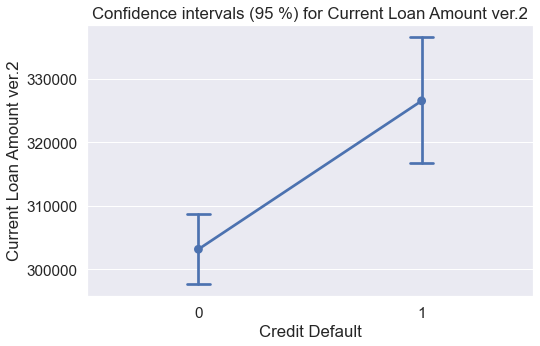

In [33]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Current Loan Amount ver.2', data=current_loan_v2_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Current Loan Amount ver.2')
plt.show()

Не пересекаются

# Оценка признака "Number of Credit Problems" в разрезе целевой переменной

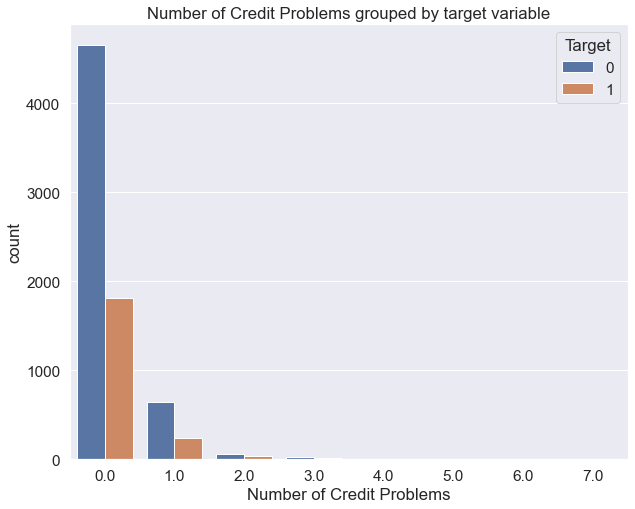

In [34]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Number of Credit Problems", hue=TARGET_NAME, data=df_new)
plt.title('Number of Credit Problems grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

## Проверка на согласованность частот (число проблем: 0, 1)

In [35]:
credit_problems_and_target_s = df_new.loc[df_new['Number of Credit Problems'].isin([0, 1]), 
                           ['Number of Credit Problems', TARGET_NAME]].sample(1000)
credit_problems_and_target_s['ID'] = credit_problems_and_target_s.index

In [36]:
table = credit_problems_and_target_s.pivot_table(values='ID', index='Number of Credit Problems', columns=TARGET_NAME, aggfunc='count')
table

Credit Default,0,1
Number of Credit Problems,,
0.0,631,256
1.0,77,36


In [37]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.5093056062610872

**Частоты согласованы**

## Проверка на согласованность частот (число проблем: 2, 3)

In [38]:
credit_problems_and_target_s = df_new.loc[df_new['Number of Credit Problems'].isin([2, 3]), 
                           ['Number of Credit Problems', TARGET_NAME]]
credit_problems_and_target_s['ID'] = credit_problems_and_target_s.index

In [39]:
table = credit_problems_and_target_s.pivot_table(values='ID', index='Number of Credit Problems', columns=TARGET_NAME, aggfunc='count')
table

Credit Default,0,1
Number of Credit Problems,,
2.0,60,33
3.0,21,14


In [40]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.6366059864241481

**Частоты согласованы**

In [ ]:
pca = PCA(1)
df_new['pca_1_H-O_OH_R'] = pca.fit_transform(df_new[['Home Ownership_Own Home', 'Home Ownership_Rent']])
df_test_new['pca_1_H-O_OH_R'] = pca.transform(df_test_new[['Home Ownership_Own Home', 'Home Ownership_Rent']])

df_new['pca_2_H-O_OH_R'] = pca.fit_transform(pd.concat([df_new, pd.get_dummies(df_new[['Home Ownership']]).iloc[:,0]], axis=1)[['Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage']])
df_test_new['pca_2_H-O_OH_R'] = pca.fit_transform(pd.concat([df_test_new, pd.get_dummies(df_test_new[['Home Ownership']]).iloc[:,0]], axis=1)[['Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage']])

# Оценка признака "Home Ownership" в разрезе целевой переменной

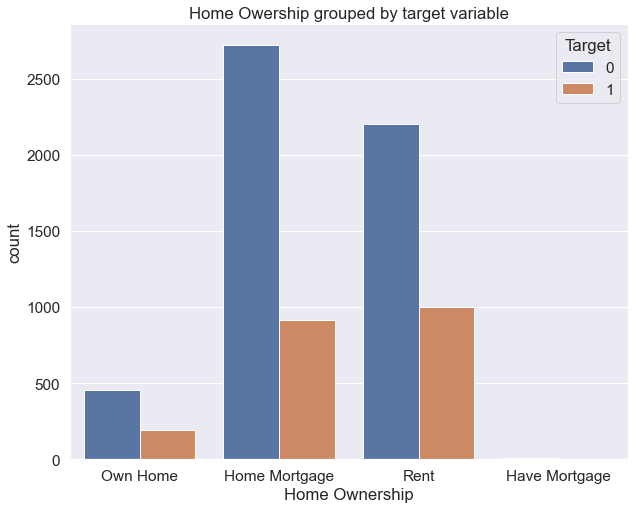

In [41]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Home Ownership", hue=TARGET_NAME, data=df_new)
plt.title('Home Owership grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

## Проверка на согласованность частот (Rent, Own Home)

In [89]:
H_O_home_mortgage_and_target_s = df_new.loc[df_new['Home Ownership'].isin(['Rent', 'Own Home']), 
                           ['Home Ownership', TARGET_NAME]].sample(1000)
H_O_home_mortgage_and_target_s['ID'] = H_O_home_mortgage_and_target_s.index

In [90]:
table = H_O_home_mortgage_and_target_s.pivot_table(values='ID', index='Home Ownership', columns=TARGET_NAME, aggfunc='count')
table

Credit Default,0,1
Home Ownership,,
Own Home,119,51
Rent,566,264


In [91]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.6439789805508753

**Частоты согласованы**

In [85]:
pca = PCA(1)
df_new['pca_1_H-O_OH_R'] = pca.fit_transform(df_new[['Home Ownership_Own Home', 'Home Ownership_Rent']])
df_test_new['pca_1_H-O_OH_R'] = pca.transform(df_test_new[['Home Ownership_Own Home', 'Home Ownership_Rent']])

df_new['pca_2_H-O_OH_R'] = pca.fit_transform(pd.concat([df_new, pd.get_dummies(df_new[['Home Ownership']]).iloc[:,0]], axis=1)[['Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage']])
df_test_new['pca_2_H-O_OH_R'] = pca.fit_transform(pd.concat([df_test_new, pd.get_dummies(df_test_new[['Home Ownership']]).iloc[:,0]], axis=1)[['Home Ownership_Have Mortgage', 'Home Ownership_Home Mortgage']])

### Сохраняем изменения датасетов

In [103]:
df_new.to_csv(PATH_COURSE_PROJECT_DATASET_TRAIN_PREP)
df_test_new.to_csv(PATH_COURSE_PROJECT_DATASET_TEST_PREP)

# Оценка признака "Number of Open Accounts" в разрезе целевой переменной

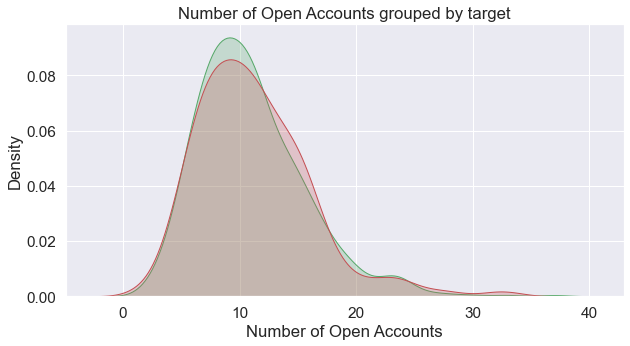

In [118]:
number_acc_with_target_s = df_new[['Number of Open Accounts', TARGET_NAME]].sample(1000)
number_acc_s = number_acc_with_target_s['Number of Open Accounts']
number_acc_target_0 = number_acc_s[number_acc_with_target_s[TARGET_NAME] == 0]
number_acc_target_1 = number_acc_s[number_acc_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(number_acc_target_0, shade=True, label='No default', color='g')
sns.kdeplot(number_acc_target_1, shade=True, label='Default', color='r')

plt.xlabel('Number of Open Accounts')
plt.title('Number of Open Accounts grouped by target')
plt.show()

## Проверка на нормальность

In [119]:
shapiro(number_acc_s)

ShapiroResult(statistic=0.9335430860519409, pvalue=1.1126612406810347e-20)

Не является нормально распеределнным

### Визуальная проверка нормальности

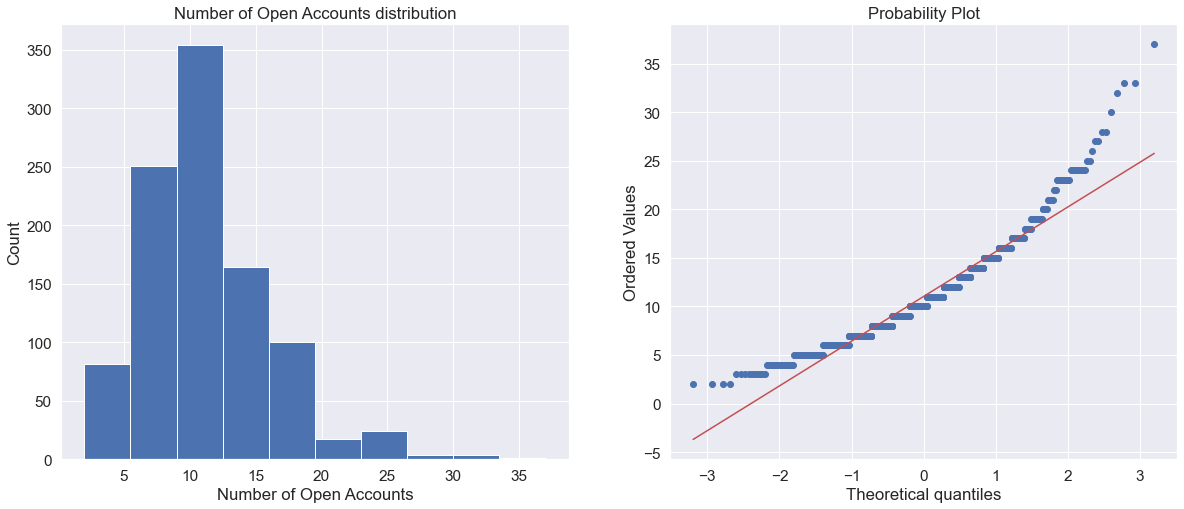

In [122]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('Number of Open Accounts')
ax1.set_ylabel('Count')
ax1.set_title('Number of Open Accounts distribution')
number_acc_s.hist()

plt.subplot(122)
probplot(number_acc_s, dist='norm', plot=plt)

plt.show()

## Проверка эквивалентности мат. ожадиний

In [121]:
mannwhitneyu(number_acc_target_0, number_acc_target_1)

MannwhitneyuResult(statistic=98337.5, pvalue=0.3103007766327317)

**Эквивалентны**

## Визуальная проверка доверительных интервалов

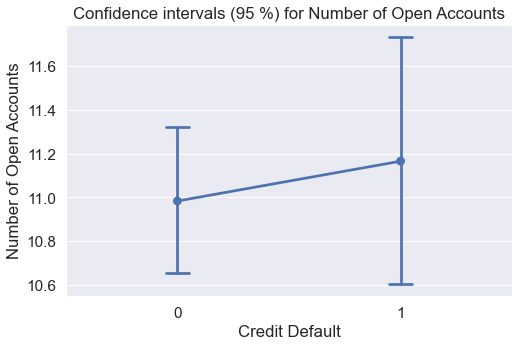

In [125]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='Number of Open Accounts', data=number_acc_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for Number of Open Accounts')
plt.show()

**Пересекаются**